In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

In [2]:
data = pd.read_csv('bank_customer_survey.csv')

    Attribte Information:
    1. age
    2. job- Type of job     
    3. marital -Marital status
    4. education-Level of education of the customer   
    5. default - has credit in default? 
    6. balance-average yearly balance, in euros     
    7. housing-has housing loan?    
    8. loan-has personal loan? 
    9. contact-how create connection with the bank (cellular, telephone)?    
    10. day- last contact day of the month     
    11. month- last contact month of year 
    12. duration- last contact duration
    13. campaign- number of contacts performed during this campaign and for this client   
    14. pdays- number of days that passed by after the client was last contacted from a previous campaign  
    15. previous- number of contacts performed before this campaign and for this client
    16. poutcome -outcome of the previous marketing campaign 
    17. y- has the client subscribed a term deposit?    


In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [4]:
data.shape

(45211, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null int64
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


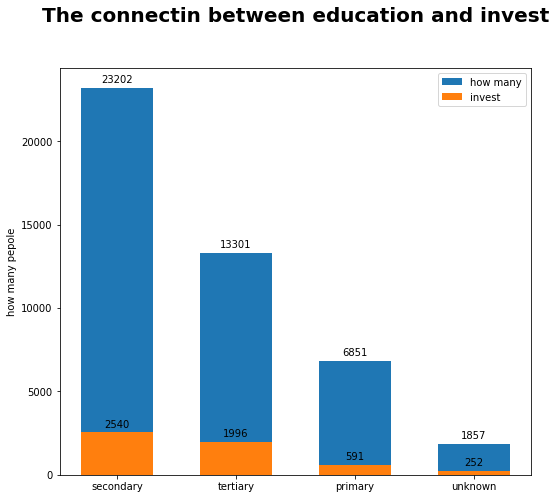

In [6]:
##have a conncection between education to term deposit?
data['education'].value_counts()
x=['secondary','tertiary','primary','unknown']
y=[23202,13301,6851, 1857]
y=[2540,1996,591,252]
df=data.groupby('education').sum()['y']
df
x=['secondary','tertiary','primary','unknown']
y1=[23202,13301,6851, 1857]  ## how much pepole
y2=[2540,1996,591,252]       ##how much invest
width = 0.6
fig, ax = plt.subplots(figsize=(8,7))
rects1 = ax.bar(x, y1,width, label='how many')
rects2 = ax.bar(x , y2,width ,label='invest')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
ax.set_ylabel('how many pepole')
ax.set_title('The connectin between education and invest', fontsize=20,fontweight= 'heavy' ,position=(0.5,1.1))
ax.legend()
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Text(0.5, 1.1, 'How many invest')

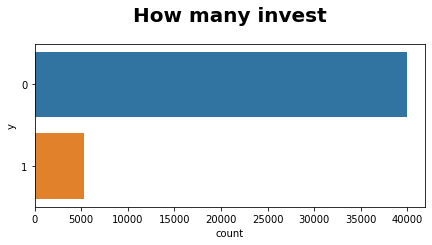

In [7]:
###how nuch pepolt invest at term deposit
plt.figure(figsize=(7,3))
sns.countplot(y='y',data=data).set_title("How many invest"
     ,fontsize=20,fontweight= 'heavy' ,position=(0.5,1.1))

A blue collar worker refers to someone whose profession requires them to perform a good amount of manual labor. Some of the most common industries that employ these individuals include 
warehousing, oil fields, firefighting, construction, manufacturing, sanitation, custodial work and technical installations.

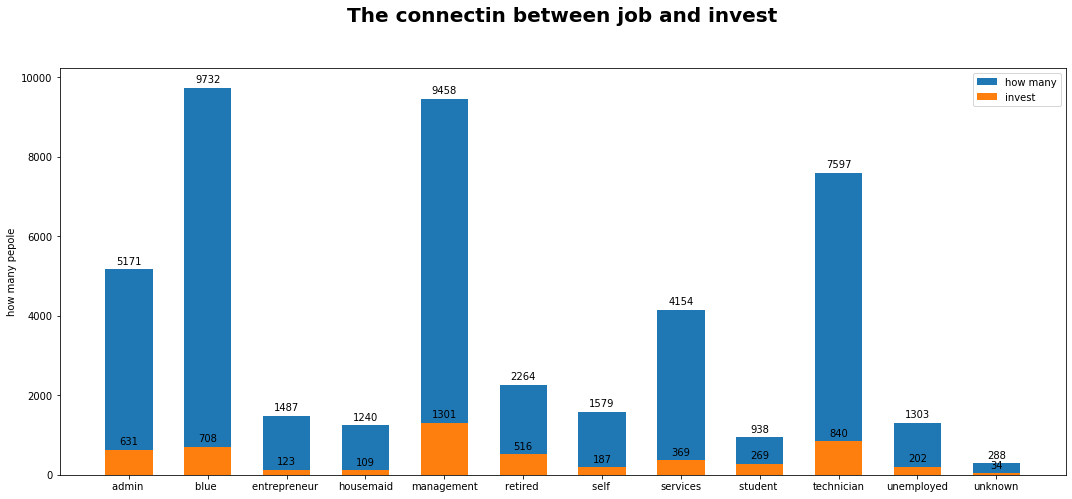

In [8]:
##have a conncection between education to term deposit?
data['job'].value_counts()
x=['secondary','tertiary','primary','unknown']
y=[23202,13301,6851, 1857]
y=[2540,1996,591,252]
df=data.groupby('job').sum()['y']
df
data['job'].value_counts()
x=['admin ','blue ','entrepreneur ','housemaid','management','retired ','self ','services','student ','technician','unemployed','unknown']
y1=[631,708,123, 109,1301,516,187,369,269,840,202,34] ##how much invest
y2=[5171,9732,1487,1240,9458,2264,1579,4154,938,7597,1303,288]   ## how many pepole     
width = 0.6
fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x, y2,width, label='how many')
rects2 = ax.bar(x , y1,width ,label='invest')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
ax.set_ylabel('how many pepole')
ax.set_title('The connectin between job and invest', fontsize=20,fontweight= 'heavy' ,position=(0.5,1.1))
ax.legend()
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

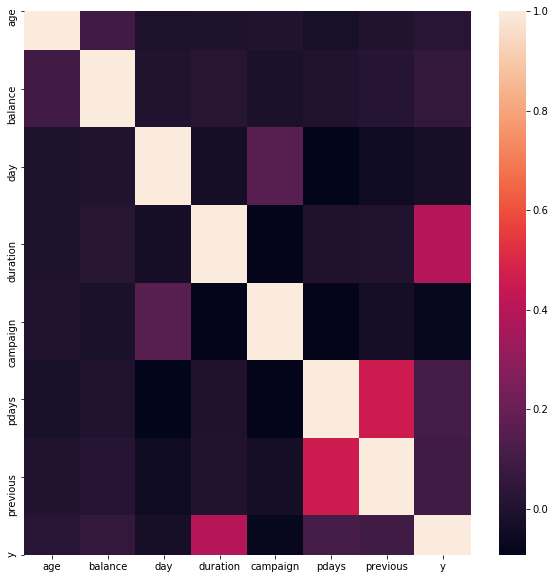

In [9]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr())

In [10]:
data['education'].value_counts()
data.fillna(0,inplace=True)

In [11]:
data['education'].isna().sum()

0

In [12]:
######
#have 1857 unknown education from 45,211
######
data['education']=data['education'].map({     
        'secondary': 0,
        'tertiary': 1 ,
        'primary': 2,
        'unkown':0
})
data['education'].fillna(0,inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,1.0,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,0.0,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,0.0,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,0.0,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,0.0,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,1.0,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,2.0,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,0.0,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue,married,0.0,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [13]:
data['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [14]:
data['marital'].isna().sum()

0

In [15]:
data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [16]:
data['marital']=data['marital'].map({     
        'married': 0,
        'single': 1 ,
        'divorced': 2 
})
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,0,1.0,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,1,0.0,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,0,0.0,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,0,0.0,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,1,0.0,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,0,1.0,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,2,2.0,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,0,0.0,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue,0,0.0,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [17]:
print(data['housing'].value_counts())
print(data['housing'].isna().sum())

yes    25130
no     20081
Name: housing, dtype: int64
0


In [18]:
data['housing']=data['housing'].map({     
        'yes': 0,
        'no': 1 
})
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,0,1.0,no,2143,0,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,1,0.0,no,29,0,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,0,0.0,no,2,0,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,0,0.0,no,1506,0,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,1,0.0,no,1,1,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,0,1.0,no,825,1,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,2,2.0,no,1729,1,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,0,0.0,no,5715,1,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue,0,0.0,no,668,1,no,telephone,17,nov,508,4,-1,0,unknown,0


In [19]:
print(data['job'].value_counts())
print(data['job'].isna().sum())

blue            9732
management      9458
technician      7597
admin           5171
services        4154
retired         2264
self            1579
entrepreneur    1487
unemployed      1303
housemaid       1240
student          938
unknown          288
Name: job, dtype: int64
0


In [20]:
data['job']=data['job'].map({     
       'blue': 0,
        'management': 1,
    'technician':2,
    'admin':3,
    'services':4,
    'retired':5,
    'self':6,
    'entrepreneur':7,
    'housemaid':8,
    'student':9,
    'unknown':0
})
############################
#288 rows with unknown from 45 thosundns
############################
data['job'].fillna(0,inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,1.0,0,1.0,no,2143,0,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,2.0,1,0.0,no,29,0,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,7.0,0,0.0,no,2,0,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,0.0,0,0.0,no,1506,0,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,0.0,1,0.0,no,1,1,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2.0,0,1.0,no,825,1,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,5.0,2,2.0,no,1729,1,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,5.0,0,0.0,no,5715,1,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,0.0,0,0.0,no,668,1,no,telephone,17,nov,508,4,-1,0,unknown,0


In [21]:
print(data['default'].value_counts())
print(data['default'].isnull().sum())

no     44396
yes      815
Name: default, dtype: int64
0


In [22]:
data['default']=data['default'].map({     
       'no': 0,
        'yes': 1
})
data['default'].fillna(0,inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,1.0,0,1.0,0,2143,0,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,2.0,1,0.0,0,29,0,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,7.0,0,0.0,0,2,0,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,0.0,0,0.0,0,1506,0,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,0.0,1,0.0,0,1,1,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2.0,0,1.0,0,825,1,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,5.0,2,2.0,0,1729,1,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,5.0,0,0.0,0,5715,1,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,0.0,0,0.0,0,668,1,no,telephone,17,nov,508,4,-1,0,unknown,0


In [23]:
data['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [24]:
data.loc['no','loan']=0
data.loc['yes','loan']=1
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,1.0,0.0,1.0,0.0,2143.0,0.0,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,0.0
1,44.0,2.0,1.0,0.0,0.0,29.0,0.0,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,0.0
2,33.0,7.0,0.0,0.0,0.0,2.0,0.0,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,0.0
3,47.0,0.0,0.0,0.0,0.0,1506.0,0.0,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,0.0
4,33.0,0.0,1.0,0.0,0.0,1.0,1.0,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,72.0,5.0,0.0,0.0,0.0,5715.0,1.0,no,cellular,17.0,nov,1127.0,5.0,184.0,3.0,success,1.0
45209,57.0,0.0,0.0,0.0,0.0,668.0,1.0,no,telephone,17.0,nov,508.0,4.0,-1.0,0.0,unknown,0.0
45210,37.0,7.0,0.0,0.0,0.0,2971.0,1.0,no,cellular,17.0,nov,361.0,2.0,188.0,11.0,other,0.0
no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
print(data['contact'].value_counts())
print(data['contact'].isnull().sum())

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
2


In [26]:
data.groupby("contact").sum()['y']  # we can see that havnt connection 
                                    # between the way they contact to the outcome if they invest

contact
cellular     4369.0
telephone     390.0
unknown       530.0
Name: y, dtype: float64

In [27]:
data['contact']=data['contact'].map({     
       'cellular': 0,
        'unknown': 0,    # i put this because that almost all the connection its by the cellular, only 10% by the telephone 
    'telephone':2        # i think too that havnt connnection between the way that they create the contact to the outcome
})
data['contact'].fillna(0,inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,1.0,0.0,1.0,0.0,2143.0,0.0,no,0.0,5.0,may,261.0,1.0,-1.0,0.0,unknown,0.0
1,44.0,2.0,1.0,0.0,0.0,29.0,0.0,no,0.0,5.0,may,151.0,1.0,-1.0,0.0,unknown,0.0
2,33.0,7.0,0.0,0.0,0.0,2.0,0.0,yes,0.0,5.0,may,76.0,1.0,-1.0,0.0,unknown,0.0
3,47.0,0.0,0.0,0.0,0.0,1506.0,0.0,no,0.0,5.0,may,92.0,1.0,-1.0,0.0,unknown,0.0
4,33.0,0.0,1.0,0.0,0.0,1.0,1.0,no,0.0,5.0,may,198.0,1.0,-1.0,0.0,unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,72.0,5.0,0.0,0.0,0.0,5715.0,1.0,no,0.0,17.0,nov,1127.0,5.0,184.0,3.0,success,1.0
45209,57.0,0.0,0.0,0.0,0.0,668.0,1.0,no,2.0,17.0,nov,508.0,4.0,-1.0,0.0,unknown,0.0
45210,37.0,7.0,0.0,0.0,0.0,2971.0,1.0,no,0.0,17.0,nov,361.0,2.0,188.0,11.0,other,0.0
no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
print(data['month'].value_counts())
print(data['month'].isnull().sum())

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
2


In [29]:
data.loc['may','month']=0
data.loc['jul','month']=1
data.loc['aug','month']=2
data.loc['jun','month']=3
data.loc['nov','month']=4
data.loc['apr','month']=5
data.loc['feb','month']=6
data.loc['jan','month']=7
data.loc['oct','month']=8
data.loc['sep','month']=9
data.loc['mar','month']=10
data.loc['dec','month']=11
data.fillna(0,inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,1.0,0.0,1.0,0.0,2143.0,0.0,no,0.0,5.0,may,261.0,1.0,-1.0,0.0,unknown,0.0
1,44.0,2.0,1.0,0.0,0.0,29.0,0.0,no,0.0,5.0,may,151.0,1.0,-1.0,0.0,unknown,0.0
2,33.0,7.0,0.0,0.0,0.0,2.0,0.0,yes,0.0,5.0,may,76.0,1.0,-1.0,0.0,unknown,0.0
3,47.0,0.0,0.0,0.0,0.0,1506.0,0.0,no,0.0,5.0,may,92.0,1.0,-1.0,0.0,unknown,0.0
4,33.0,0.0,1.0,0.0,0.0,1.0,1.0,no,0.0,5.0,may,198.0,1.0,-1.0,0.0,unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
jan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,7,0.0,0.0,0.0,0.0,0,0.0
oct,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,8,0.0,0.0,0.0,0.0,0,0.0
sep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,9,0.0,0.0,0.0,0.0,0,0.0
mar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,10,0.0,0.0,0.0,0.0,0,0.0


In [30]:
print(data['poutcome'].value_counts())
print(data['poutcome'].isnull().sum())

unknown    36959
failure     4901
other       1840
success     1511
0             14
Name: poutcome, dtype: int64
0


In [31]:
data.groupby("poutcome").sum()['y']  #you can see that who that invest at the last time 
                                    #do it again 1511(last time)-978(this time)

poutcome
0             0.0
failure     618.0
other       307.0
success     978.0
unknown    3386.0
Name: y, dtype: float64

In [32]:
data.loc['unknown','poutcome']=0 # because that almot all the pepole that unkown didnt invest
                                 # so my assuption is that it not succeed at the last time too
data.loc['failure','poutcome']=0
data.loc['other','poutcome']=1
data.loc['success','poutcome']=2
data['poutcome'].fillna(0,inplace=True)
data
data.fillna(0,inplace=True)

In [33]:
dummy_data=pd.get_dummies(data)
dummy_data

,age,job,marital,education,default,balance,housing,contact,day,duration,...,month_nov,month_oct,month_sep,poutcome_0,poutcome_1,poutcome_2,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,1.0,0.0,1.0,0.0,2143.0,0.0,0.0,5.0,261.0,...,0,0,0,0,0,0,0,0,0,1
1,44.0,2.0,1.0,0.0,0.0,29.0,0.0,0.0,5.0,151.0,...,0,0,0,0,0,0,0,0,0,1
2,33.0,7.0,0.0,0.0,0.0,2.0,0.0,0.0,5.0,76.0,...,0,0,0,0,0,0,0,0,0,1
3,47.0,0.0,0.0,0.0,0.0,1506.0,0.0,0.0,5.0,92.0,...,0,0,0,0,0,0,0,0,0,1
4,33.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5.0,198.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dec,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
failure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = dummy_data.loc[:,dummy_data.columns != 'y'], dummy_data.loc[:,'y']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=3) accuracy is: ', knn.score(x_test,y_test))

With KNN (K=3) accuracy is:  0.8898223892696587


In [35]:
prediction = knn.predict(x_test)
confusion_matrix(y_test, prediction)

array([[11435,   523],
       [  972,   639]], dtype=int64)

In [36]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94     11958
         1.0       0.55      0.40      0.46      1611

    accuracy                           0.89     13569
   macro avg       0.74      0.68      0.70     13569
weighted avg       0.88      0.89      0.88     13569



In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier(n_neighbors = 10)
x,y = dummy_data.loc[:,dummy_data.columns != 'y'], dummy_data.loc[:,'y']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=10) accuracy is: ', knn.score(x_test,y_test))

With KNN (K=10) accuracy is:  0.8839265973911121


In [38]:
prediction = knn.predict(x_test)
confusion_matrix(y_test, prediction)

array([[11696,   262],
       [ 1313,   298]], dtype=int64)

In [39]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94     11958
         1.0       0.53      0.18      0.27      1611

    accuracy                           0.88     13569
   macro avg       0.72      0.58      0.61     13569
weighted avg       0.86      0.88      0.86     13569



In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
knn = KNeighborsClassifier(n_neighbors = 200)
x,y = dummy_data.loc[:,dummy_data.columns != 'y'], dummy_data.loc[:,'y']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=200) accuracy is: ', knn.score(x_test,y_test))

With KNN (K=200) accuracy is:  0.8853268479622669


In [41]:
prediction = knn.predict(x_test)
confusion_matrix(y_test, prediction)

array([[11836,   122],
       [ 1434,   177]], dtype=int64)

In [42]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94     11958
         1.0       0.59      0.11      0.19      1611

    accuracy                           0.89     13569
   macro avg       0.74      0.55      0.56     13569
weighted avg       0.86      0.89      0.85     13569



In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
knn = KNeighborsClassifier(n_neighbors = 500)
x,y = dummy_data.loc[:,dummy_data.columns != 'y'], dummy_data.loc[:,'y']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=500) accuracy is: ', knn.score(x_test,y_test))

With KNN (K=500) accuracy is:  0.8837055051956666


In [44]:
prediction = knn.predict(x_test)
confusion_matrix(y_test, prediction)

array([[11876,    82],
       [ 1496,   115]], dtype=int64)

In [45]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94     11958
         1.0       0.58      0.07      0.13      1611

    accuracy                           0.88     13569
   macro avg       0.74      0.53      0.53     13569
weighted avg       0.85      0.88      0.84     13569



In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)
from sklearn.ensemble import RandomForestClassifier
other = RandomForestClassifier(n_estimators=1000)         
other.fit(x_train,y_train)
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
y_pred = other.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9024983418085342


In [48]:
confusion_matrix(y_test,y_pred)

array([[11609,   360],
       [  963,   637]], dtype=int64)

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)
from sklearn.ensemble import RandomForestClassifier
other = RandomForestClassifier(n_estimators=10)         
other.fit(x_train,y_train)
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
y_pred = other.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8975606161102513


In [50]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[11639,   330],
       [ 1060,   540]], dtype=int64)